In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
df = pd.read_csv('../Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [52]:
df.drop(['title'], inplace=True, axis=1)

In [53]:
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [54]:
# df['esrb_rating'] = df['esrb_rating'].replace(
#     'E', 0).replace('ET', 1).replace('T', 2).replace('M', 3)

y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [56]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
y_pred = svclassifier.predict(X_test)

Text(0.5, 1.0, 'ESRB Rating')

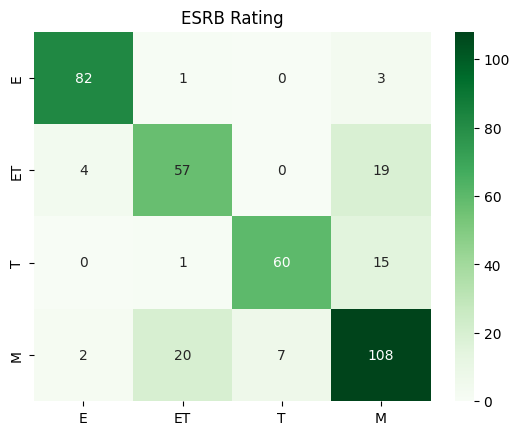

In [58]:
cm = confusion_matrix(y_test,y_pred)


Labels = ["E","ET","T","M"] # labels for x-axis
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels).set_title('ESRB Rating')

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           E       0.93      0.95      0.94        86
          ET       0.72      0.71      0.72        80
           M       0.90      0.79      0.84        76
           T       0.74      0.79      0.77       137

    accuracy                           0.81       379
   macro avg       0.82      0.81      0.82       379
weighted avg       0.81      0.81      0.81       379

